# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

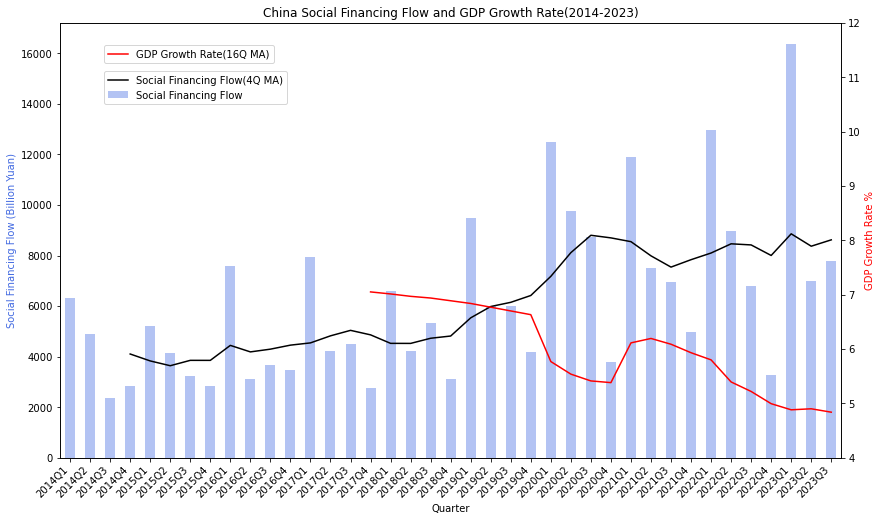

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import re

####### Analytic Data: Extract, Transform and Load #######

# 0. load the dataset from the Chinese authority websites.
af = pd.read_csv("assets/Aggregate Financing Flow 2014-2023.csv", sep=';')
gdp_index = pd.read_excel("assets/China GDP growth index.xls", skiprows=2, skipfooter=7)

# 1. prepared the data for the Aggregated Financing data by Quarters

# Step 1: Convert date column to datetime object, Create a new column for quarters
af['Date'] = pd.to_datetime(af['Month'].astype(str), format='%Y.%m')
af['Quarter'] = af['Date'].dt.to_period('Q')

# Step 2: Group by quarters and aggregate the data
af_q = af.groupby('Quarter')['AFRE(flow)'].sum().reset_index()
# Turn the 100 million yuan to 1 billion yuan
af_q['AFRE(flow)'] = af_q['AFRE(flow)'] / 10

# Step 3: Rename columns in the new DataFrame, Set the index to 'Quarter'
af_q.columns = ['Quarter', 'Aggregated Financing Flow']
af_q.set_index('Quarter', inplace=True, drop=True)



# 2. prepared the data for the China GDP growth rate

# Step 1: Extract the first row of 'gdp_index', 
# Reverse the row as a column, having the data from 2014-2023
gdp_row = gdp_index.iloc[:1, :]
gdp_column = gdp_row.transpose().astype(str)
# Remove the first row, as it contains the original row names which are not needed
gdp_column = gdp_column.iloc[1:]

# Step 2: Transform the dateset as the same shape as the Aggregated Financing dataset.
# Change the column name
gdp_column.columns = ['GDP Index']
# Change to data type
gdp_column['Quarter'] = gdp_column.index

# Step 3: Set the index to datetime with the desired format
gdp_column['Quarter'] = pd.to_datetime(gdp_column['Quarter'].astype(str), format='%Y.%m').dt.to_period('Q')
# Set the index to 'Quarter', drop the previous index
gdp_column.set_index('Quarter', inplace=True, drop=True)

# Step 4: Calculate the 'GDP Growth Rate' = 'GDP Index' - 100
gdp_column['GDP Growth Rate'] = gdp_column['GDP Index'].astype(float) - 100
# Generate a new dataset named 'GDP_growth'
GDP_growth = gdp_column[['GDP Growth Rate']].copy()
GDP_growth.sort_values(by='Quarter', inplace=True)

####### Visualization: Observe the corralation of these two factors #######

# 1. Merge the dataset 'af_q' and 'GDP_growth' by 'Quarter'
merged_data = pd.merge(af_q, GDP_growth, how='inner', left_index=True, right_index=True)

# 2. Visualization: The 'Aggregated Financing Flow' shows as Bar Chart
# The 'GDP_growth' shows as line chart overlapped.

plt.figure(figsize=(14, 8))

# Plotting the Bar Chart for 'Aggregated Financing Flow'
ax = merged_data['Aggregated Financing Flow'].plot(kind='bar', color='royalblue', alpha=0.4, label='Social Financing Flow')

# Plotting the Line Chart for 'GDP Growth Rate' overlapped
ax2 = ax.twinx()
#ax2.plot(merged_data.index.astype(str), merged_data['GDP Growth Rate'].astype(float), color='red', label='GDP Growth Rate', marker='o')

# Calculate and plot 4-quarter moving averages for 'Aggregated Financing Flow'
af_ma = merged_data['Aggregated Financing Flow'].rolling(window=4).mean()
ax.plot(af_ma.index.astype(str), af_ma, color='black', label='Social Financing Flow(4Q MA)')

# Calculate and plot 4-quarter moving averages for 'GDP Growth Rate'
gdp_ma = merged_data['GDP Growth Rate'].rolling(window=16).mean()
ax2.plot(merged_data.index.astype(str), gdp_ma, color='red', label='GDP Growth Rate(16Q MA)')

# Set labels and title
ax.set_xlabel('Quarter')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_ylabel('Social Financing Flow (Billion Yuan)', color='royalblue')
ax2.set_ylabel('GDP Growth Rate %', color='red')
ax2.set_ylim(4, 12)
plt.title('China Social Financing Flow and GDP Growth Rate(2014-2023)')

# Display the legend
ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.96))
ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.90))

# Show the plot
plt.show()
